# **Analyzing Flight Delays and Cancellations**

![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Start your code here!
flights = pd.read_csv('flights2022.csv')
flights_weather = pd.read_csv('flights_weather2022.csv')

In [2]:
flights.shape

(111376, 20)

In [3]:
flights_weather.shape

(111006, 29)

In [4]:
flights.sample(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
2620,2022,1,5,1720.0,1645,35.0,1949.0,1912,37.0,QX,597,N430QX,SEA,BOI,73.0,399,16,45,2022-01-05T16:00:00Z,Horizon Air
51295,2022,3,31,47.0,50,-3.0,607.0,610,-3.0,DL,254,N381DZ,PDX,MSP,179.0,1426,0,50,2022-03-31T00:00:00Z,Delta Air Lines Inc.
52418,2022,4,1,1930.0,1935,-5.0,2135.0,2139,-4.0,OO,728,N402SY,SEA,FAT,106.0,748,19,35,2022-04-01T19:00:00Z,SkyWest Airlines Inc.
91603,2022,6,2,757.0,800,-3.0,1130.0,1150,-20.0,WN,335,N8578Q,SEA,DEN,128.0,1024,8,0,2022-06-02T08:00:00Z,Southwest Airlines Co.
6983,2022,1,13,705.0,700,5.0,1043.0,1045,-2.0,WN,1077,N737JW,SEA,PHX,140.0,1107,7,0,2022-01-13T07:00:00Z,Southwest Airlines Co.
82541,2022,5,19,955.0,1000,-5.0,1054.0,1056,-2.0,QX,491,N643QX,SEA,PDX,29.0,129,10,0,2022-05-19T10:00:00Z,Horizon Air
109483,2022,6,28,916.0,925,-9.0,1100.0,1104,-4.0,QX,658,N404QX,PDX,RNO,85.0,444,9,25,2022-06-28T09:00:00Z,Horizon Air
17397,2022,1,31,2035.0,2045,-10.0,2233.0,2253,-20.0,AS,45,N268AK,SEA,SJC,97.0,696,20,45,2022-01-31T20:00:00Z,Alaska Airlines Inc.
69596,2022,4,28,2201.0,2155,6.0,621.0,620,1.0,AS,308,N532AS,PDX,BOS,286.0,2537,21,55,2022-04-28T21:00:00Z,Alaska Airlines Inc.
3831,2022,1,7,1708.0,1710,-2.0,1917.0,1923,-6.0,OO,1029,N287SY,SEA,SFO,104.0,679,17,10,2022-01-07T17:00:00Z,SkyWest Airlines Inc.


In [5]:
flights_weather.sample(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
80580,2022,5,16,1804.0,1800,4.0,5.0,2359,6.0,AS,355,N287AK,SEA,AUS,206.0,1770,18,0,Alaska Airlines Inc.,SEA-AUS,56.0,43.0,61.81,230.0,12.65858,14.567241,0.0000,1021.2,10.0
41714,2022,3,15,1342.0,1340,2.0,1637.0,1645,-8.0,DL,302,N851DN,SEA,SLC,92.0,689,13,40,Delta Air Lines Inc.,SEA-SLC,45.0,43.0,92.65,180.0,9.20624,10.594357,0.0001,1016.3,10.0
87320,2022,5,27,550.0,600,-10.0,642.0,702,-20.0,AS,136,N512AS,PDX,SEA,31.0,129,6,0,Alaska Airlines Inc.,PDX-SEA,62.0,59.0,89.57,100.0,6.90468,7.945768,0.0000,1010.7,10.0
4930,2022,1,9,1511.0,1515,-4.0,1633.0,1637,-4.0,OO,1019,N271SY,SEA,MFR,67.0,352,15,15,SkyWest Airlines Inc.,SEA-MFR,33.0,30.9,91.51,340.0,6.90468,7.945768,0.0000,1026.3,10.0
96898,2022,6,10,1340.0,1327,13.0,2103.0,2118,-15.0,DL,128,N588NW,SEA,ATL,235.0,2182,13,27,Delta Air Lines Inc.,SEA-ATL,57.0,55.0,93.01,240.0,8.05546,9.270062,0.0000,1014.7,10.0
55992,2022,4,7,NaN,950,NaN,NaN,1715,NaN,AS,306,N224AK,SEA,CMH,NaN,2016,9,50,Alaska Airlines Inc.,SEA-CMH,47.0,36.0,65.63,10.0,6.90468,7.945768,0.0000,1026.4,10.0
2534,2022,1,5,1354.0,1340,14.0,1642.0,1642,0.0,QX,602,N404QX,SEA,BIL,93.0,664,13,40,Horizon Air,SEA-BIL,37.0,34.0,88.78,0.0,0.00000,0.000000,0.0000,1021.7,10.0
95990,2022,6,9,917.0,925,-8.0,1506.0,1533,-27.0,DL,366,N136DQ,SEA,AUS,204.0,1770,9,25,Delta Air Lines Inc.,SEA-AUS,58.0,47.0,66.70,140.0,3.45234,3.972884,0.0000,1015.1,10.0
5059,2022,1,9,1935.0,1920,15.0,2224.0,2202,22.0,DL,689,N113DQ,SEA,SNA,140.0,978,19,20,Delta Air Lines Inc.,SEA-SNA,45.0,35.0,68.05,280.0,4.60312,5.297178,0.0000,1026.0,10.0
88732,2022,5,29,943.0,935,8.0,1751.0,1752,-1.0,AS,18,N921AK,SEA,PHL,285.0,2378,9,35,Alaska Airlines Inc.,SEA-PHL,49.0,48.0,96.69,240.0,3.45234,3.972884,0.0600,1010.2,5.0


In [6]:
flights['route'] = flights['origin'] + '-' + flights['dest']

In [7]:
# Calculate mean departure delay and number of cancelled flights for each flight route
routes_delays_cancels = flights.groupby('route').agg(
    mean_dep_delay = ('dep_delay', 'mean'),
    total_cancellations = ('dep_time', lambda x: x.isna().sum())
).reset_index()

In [8]:
# Identify routes with highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values('mean_dep_delay', ascending=False).head(9)

In [9]:
top_routes_by_delay

,route,mean_dep_delay,total_cancellations
13,PDX-DSM,35.782609,0
19,PDX-GRR,35.739130,2
17,PDX-FLL,30.893617,3
109,SEA-MIA,29.916667,4
71,SEA-CLT,27.313199,14
52,PDX-STL,27.000000,0
5,PDX-BOS,24.812500,4
12,PDX-DFW,24.735941,23
9,PDX-DAL,24.100000,0


In [11]:
top_routes_by_cancellations = routes_delays_cancels.sort_values('total_cancellations', ascending=False).head(9)

top_routes_by_cancellations

,route,mean_dep_delay,total_cancellations
103,SEA-LAX,7.195969,93
58,SEA-ANC,9.316991,78
137,SEA-SFO,7.054403,73
102,SEA-LAS,8.943503,73
121,SEA-PDX,7.730982,71
98,SEA-JFK,17.305890,70
46,PDX-SEA,4.684694,68
76,SEA-DEN,8.302342,66
120,SEA-ORD,10.397800,63


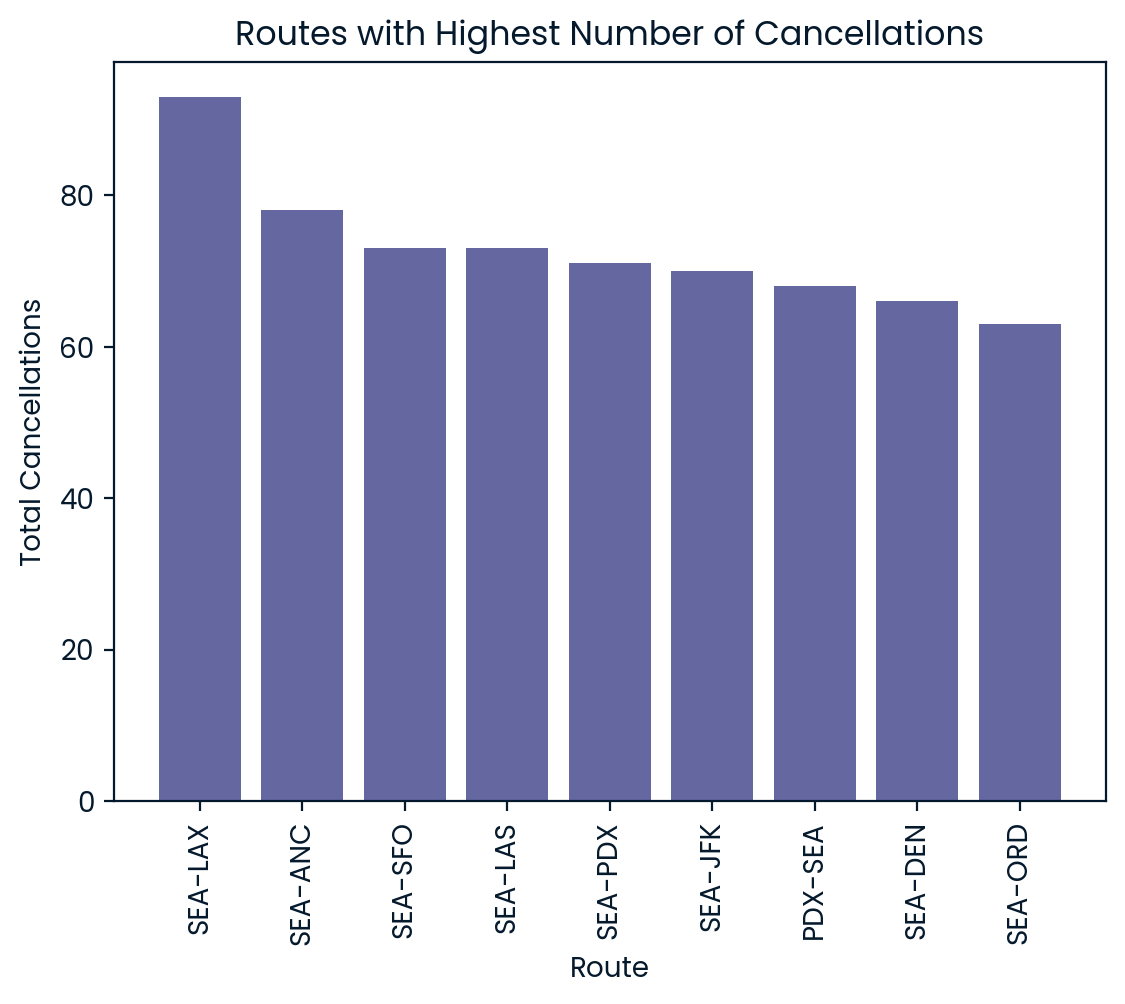

In [12]:
# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

In [13]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights.groupby('airline').agg(
    mean_dep_delay = ('dep_delay', 'mean'),
    total_cancellations = ('dep_time', lambda x: x.isna().sum())
).reset_index()

In [14]:
top_airlines_by_delay = airlines_delays_cancels.sort_values('mean_dep_delay', ascending=False).head(9)
top_airlines_by_delay

,airline,mean_dep_delay,total_cancellations
7,JetBlue Airways,42.141524,33
1,Allegiant Air,26.608696,6
2,American Airlines Inc.,20.129903,85
4,Frontier Airlines Inc.,14.355856,12
9,Southwest Airlines Co.,11.407163,100
10,Spirit Air Lines,11.095758,39
3,Delta Air Lines Inc.,10.648634,383
5,Hawaiian Airlines Inc.,8.186207,4
11,United Air Lines Inc.,7.072115,80


In [15]:
top_airlines_by_cancellation = airlines_delays_cancels.sort_values('total_cancellations', ascending=False).head(9)

top_airlines_by_cancellation

,airline,mean_dep_delay,total_cancellations
0,Alaska Airlines Inc.,6.739282,1300
3,Delta Air Lines Inc.,10.648634,383
6,Horizon Air,6.270965,238
8,SkyWest Airlines Inc.,4.596561,165
9,Southwest Airlines Co.,11.407163,100
2,American Airlines Inc.,20.129903,85
11,United Air Lines Inc.,7.072115,80
10,Spirit Air Lines,11.095758,39
7,JetBlue Airways,42.141524,33


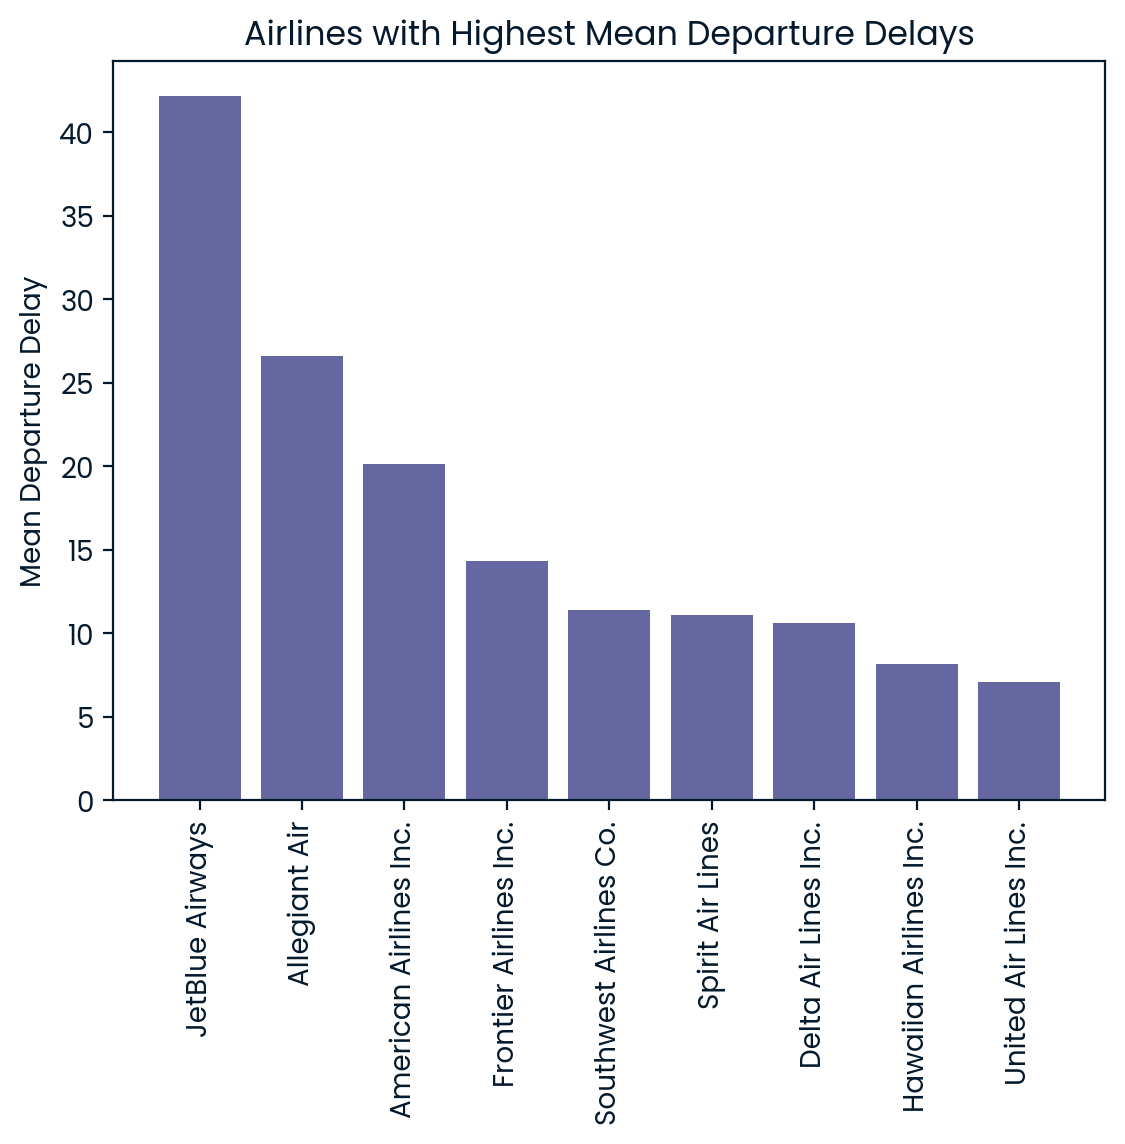

In [17]:
# Create a bar graph for highest mean departure delay
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

In [18]:
# Are departure delays impacted by 10+ mph winds from each airport
flights_weather['group'] = flights_weather['wind_gust'].apply(lambda x: ">= 10mph" if x >= 10 else "< 10mph")

wind_grouped_data = flights_weather.groupby(['group','origin']).agg(
    mean_dep_delay = ('dep_delay','mean')
)

print(wind_grouped_data)
wind_response = True

                 mean_dep_delay
group    origin                
< 10mph  PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060
